INTRODUCTION: Problem Definition

Road traffic injuries are one of the leading cause of death across  many countries and are predicted to increase drastcally in the coming  years.  The government and civic bodies need to understand what is the cause of such accidents. Hence a thorough data exploration and analysis is required to find the reasons for the same. An accurate prediction of the accidents can be  predicted by analysing factors like vehicles used, time of the day, gender of drivers, age of the drivers among many other factors. This project will help civic bodies and governments to find out the cause for these accidents and come up with various measures to curtail these accidents which are growing in number by the day,


DATA:


The data for this project is sourced from the https://data.gov.uk/ - road safety data
https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data

The following data processing and analyzing is followed for this project:
1. Import all the required libraries
2. Import the datasets
3. Accident Datasets
4. Analyse the accident dataset
5. Casualities data set
6. Corelation - Accidents
7. Accidents severity based on road type
8. Scatter plot of longitude/latitude
9. Correlation - Casualities
10.Distribution of Casualities based on age
11.Accident severity Distribution based on Sex
12.Accident Severity distribution based on Light conditions
13.Accident severity distribution based on road type

Based on the above data extraction and analysis the following issues can be predicted:
 - Which the age group  has the most number of accidents 
 - Most of the accidents fall under which gender category - is it male/female category.   
 - Do most accidents occur in daylight/night time  
 - Most of the accidents occur in which road type

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
print('Libraries Imported')

Libraries Imported


Import Data

-Accident Data Set

In [66]:

Accidents= pd.read_csv('http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Accidents_2018.csv')

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [67]:
Accidents.head(5)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2018010080971,529150.0,182270.0,-0.139737,51.524587,1,3,2,2,01/01/2018,...,0,0,4,1,1,0,0,1,1,E01000854
1,2018010080973,542020.0,184290.0,0.046471,51.539651,1,3,1,1,01/01/2018,...,0,0,4,1,1,0,0,1,1,E01003531
2,2018010080974,531720.0,182910.0,-0.102474,51.529746,1,3,2,1,01/01/2018,...,0,5,4,1,1,0,0,1,1,E01002723
3,2018010080981,541450.0,183220.0,0.037828,51.530179,1,2,2,1,01/01/2018,...,0,5,4,2,2,0,0,1,1,E01003492
4,2018010080982,543580.0,176500.0,0.065781,51.469258,1,2,2,2,01/01/2018,...,0,0,4,1,2,0,0,1,1,E01001682


In [68]:
Accidents.shape

(122635, 32)

In [69]:
Accidents.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

In [70]:
#dropping unwanted columns:
Accidents.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR','LSOA_of_Accident_Location',
                'Junction_Control' ,'2nd_Road_Class','Did_Police_Officer_Attend_Scene_of_Accident'], axis=1, inplace=True)

In [71]:
Accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122635 entries, 0 to 122634
Data columns (total 26 columns):
Accident_Index                             122635 non-null object
Longitude                                  122580 non-null float64
Latitude                                   122580 non-null float64
Police_Force                               122635 non-null int64
Accident_Severity                          122635 non-null int64
Number_of_Vehicles                         122635 non-null int64
Number_of_Casualties                       122635 non-null int64
Date                                       122635 non-null object
Day_of_Week                                122635 non-null int64
Time                                       122622 non-null object
Local_Authority_(District)                 122635 non-null int64
Local_Authority_(Highway)                  122635 non-null object
1st_Road_Class                             122635 non-null int64
1st_Road_Number                     

In [72]:
#checking for any null values
Accidents.isnull().sum()

Accident_Index                              0
Longitude                                  55
Latitude                                   55
Police_Force                                0
Accident_Severity                           0
Number_of_Vehicles                          0
Number_of_Casualties                        0
Date                                        0
Day_of_Week                                 0
Time                                       13
Local_Authority_(District)                  0
Local_Authority_(Highway)                   0
1st_Road_Class                              0
1st_Road_Number                             0
Road_Type                                   0
Speed_limit                                 0
Junction_Detail                             0
2nd_Road_Number                             0
Pedestrian_Crossing-Human_Control           0
Pedestrian_Crossing-Physical_Facilities     0
Light_Conditions                            0
Weather_Conditions                

In [73]:
#dropping all rows that contains null values in it:
#Here dropping null rows doesn't affect the processing: 
Accidents=Accidents.dropna()
Accidents.shape

(122567, 26)


Casualities Dataset

In [74]:
Casualities= pd.read_csv('http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Casualties_2018.csv')

In [75]:
Casualities.head()

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2018010080971,1,1,2,2,50,8,3,0,0,2,0,0,9,1,8
1,2018010080971,2,2,1,1,48,8,3,0,0,0,0,0,8,1,1
2,2018010080973,1,1,3,1,29,6,3,5,1,0,0,2,0,1,3
3,2018010080974,1,1,1,1,40,7,3,0,0,0,0,0,8,1,3
4,2018010080981,1,1,1,1,27,6,2,0,0,0,0,0,9,1,7


In [76]:
Casualities.isnull().sum()

Accident_Index                        0
Vehicle_Reference                     0
Casualty_Reference                    0
Casualty_Class                        0
Sex_of_Casualty                       0
Age_of_Casualty                       0
Age_Band_of_Casualty                  0
Casualty_Severity                     0
Pedestrian_Location                   0
Pedestrian_Movement                   0
Car_Passenger                         0
Bus_or_Coach_Passenger                0
Pedestrian_Road_Maintenance_Worker    0
Casualty_Type                         0
Casualty_Home_Area_Type               0
Casualty_IMD_Decile                   0
dtype: int64

In [77]:
Casualities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160597 entries, 0 to 160596
Data columns (total 16 columns):
Accident_Index                        160597 non-null object
Vehicle_Reference                     160597 non-null int64
Casualty_Reference                    160597 non-null int64
Casualty_Class                        160597 non-null int64
Sex_of_Casualty                       160597 non-null int64
Age_of_Casualty                       160597 non-null int64
Age_Band_of_Casualty                  160597 non-null int64
Casualty_Severity                     160597 non-null int64
Pedestrian_Location                   160597 non-null int64
Pedestrian_Movement                   160597 non-null int64
Car_Passenger                         160597 non-null int64
Bus_or_Coach_Passenger                160597 non-null int64
Pedestrian_Road_Maintenance_Worker    160597 non-null int64
Casualty_Type                         160597 non-null int64
Casualty_Home_Area_Type               160597 non

In [78]:
Casualities.shape

(160597, 16)

In [79]:
Casualities.columns

Index(['Accident_Index', 'Vehicle_Reference', 'Casualty_Reference',
       'Casualty_Class', 'Sex_of_Casualty', 'Age_of_Casualty',
       'Age_Band_of_Casualty', 'Casualty_Severity', 'Pedestrian_Location',
       'Pedestrian_Movement', 'Car_Passenger', 'Bus_or_Coach_Passenger',
       'Pedestrian_Road_Maintenance_Worker', 'Casualty_Type',
       'Casualty_Home_Area_Type', 'Casualty_IMD_Decile'],
      dtype='object')

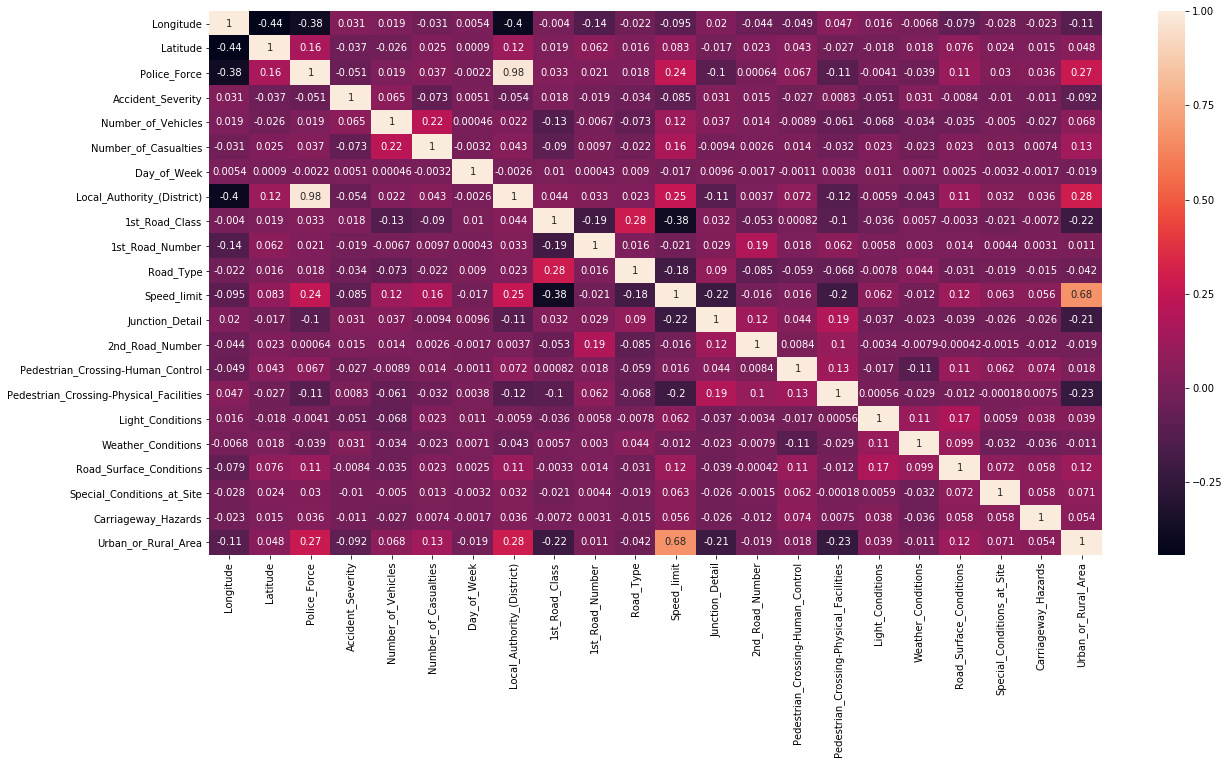

In [80]:


Correlation = Accidents.corr()
plt.figure(figsize=(20,10))
sns.heatmap(Correlation, annot=True)



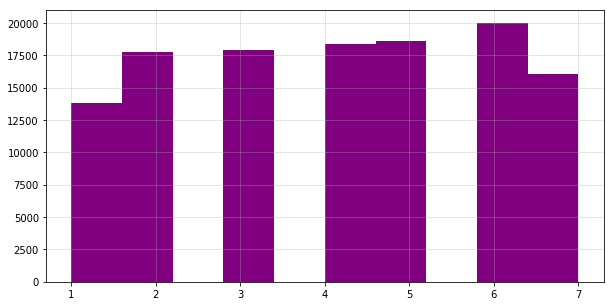

In [81]:
#Distribution of accients based on week:
plt.figure(figsize=(10,5))
Accidents['Day_of_Week'].hist(color='purple')
plt.grid(alpha=0.4)

Accident Severity distribution based on Road type 

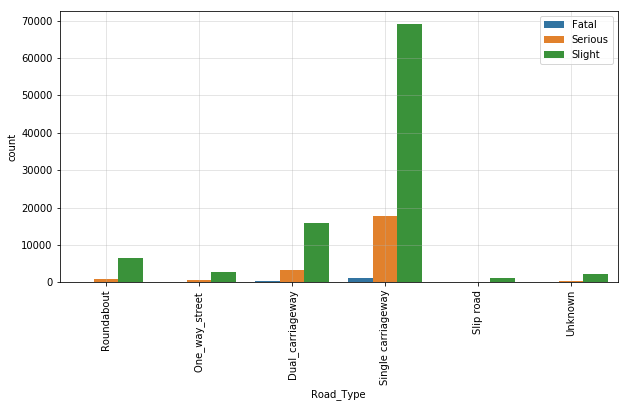

In [82]:
#Accidents severity based on road type:
plt.figure(figsize=(10,5))
ax=sns.countplot('Road_Type',hue='Accident_Severity',data=Accidents)
ax.set_xticklabels(['Roundabout','One_way_street ','Dual_carriageway','Single carriageway','Slip road','Unknown'])
plt.xticks(rotation=90)
plt.legend(['Fatal','Serious','Slight'])
plt.grid(alpha=0.4)

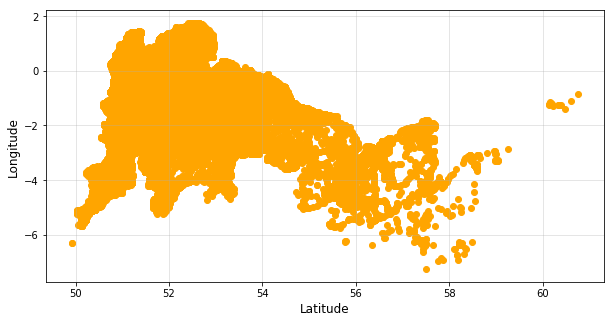

In [83]:
#Scatter plot of Longitude/Latitude
plt.figure(figsize=(10,5))
plt.scatter(x='Latitude',y='Longitude',data=Accidents,c='orange')
plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Longitude',fontsize=12)
plt.grid(alpha=0.4)

<Figure size 720x1080 with 0 Axes>

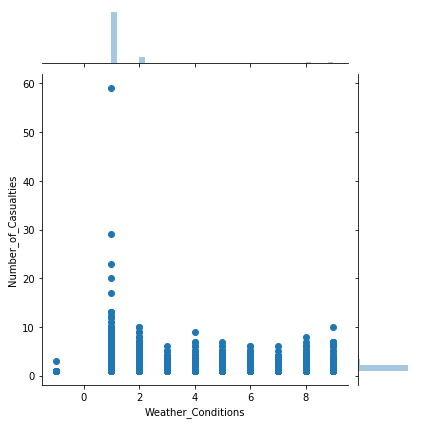

In [84]:
plt.figure(figsize=(10,15))
sns.jointplot(x='Weather_Conditions',y='Number_of_Casualties',data=Accidents)

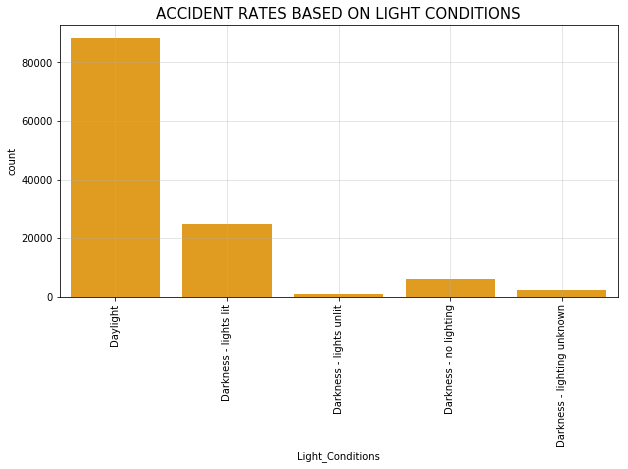

In [85]:


plt.figure(figsize=(10,5))
ax=sns.countplot('Light_Conditions',data=Accidents,color='orange') 
ax.set_xticklabels(['Daylight','Darkness - lights lit',
                    'Darkness - lights unlit','Darkness - no lighting','Darkness - lighting unknown'])
plt.xticks(Rotation=90)
plt.title('ACCIDENT RATES BASED ON LIGHT CONDITIONS',fontsize=15)
plt.grid(alpha=0.4)
plt.show()



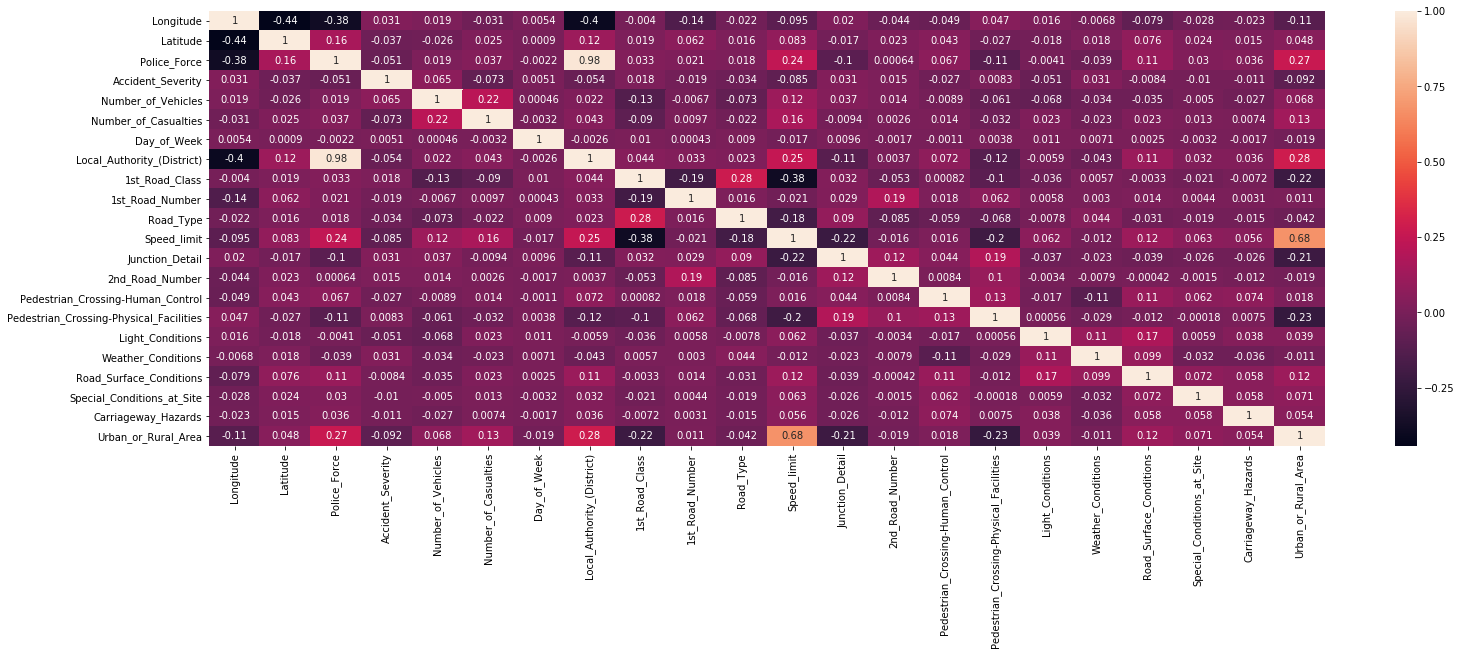

In [86]:
correlation=Casualities.corr()
plt.figure(figsize=(25,8))
sns.heatmap(Correlation,annot=True)

<Figure size 432x288 with 0 Axes>

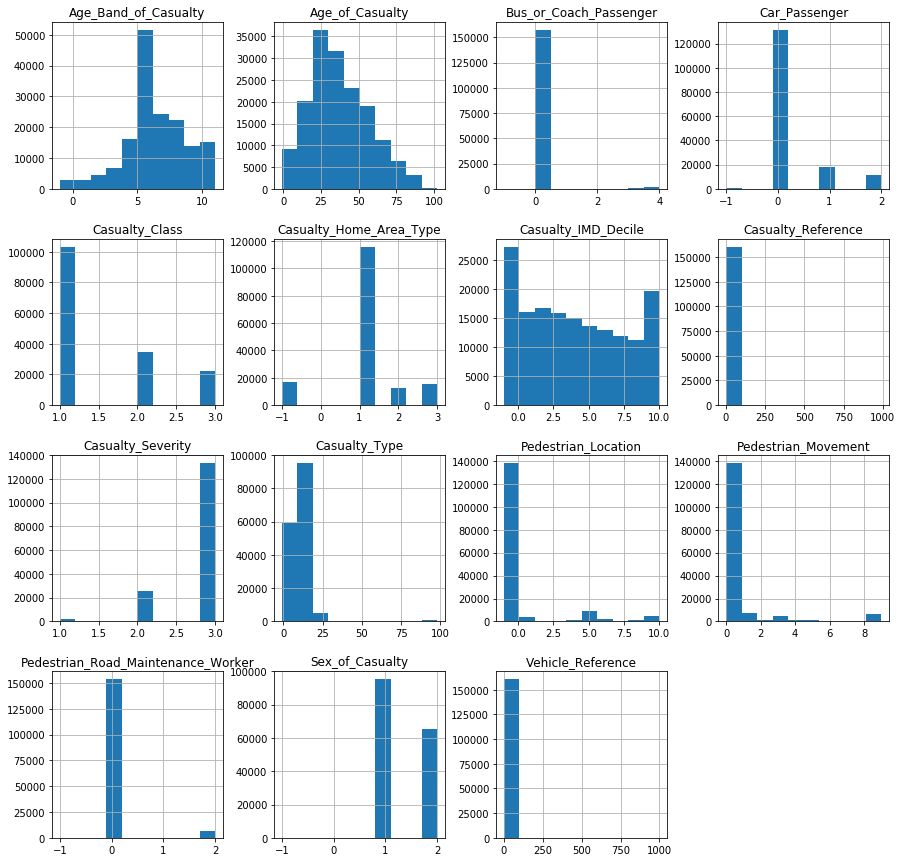

In [87]:


plt.figure()
Casualities.hist(figsize=(15,15));



Casualtiy Distribution Based on Age

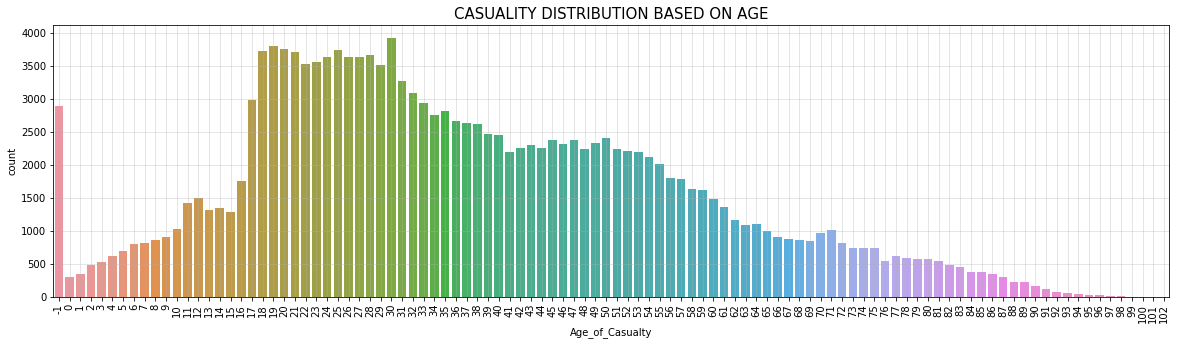

In [88]:
#Distrubution of casualities based on age:
plt.figure(figsize=(20,5))
sns.countplot('Age_of_Casualty',data=Casualities)
plt.title('CASUALITY DISTRIBUTION BASED ON AGE', fontsize=15)
plt.xticks(rotation=90)
plt.grid(alpha=0.4)
plt.show()

Casuality Distribution by Sex

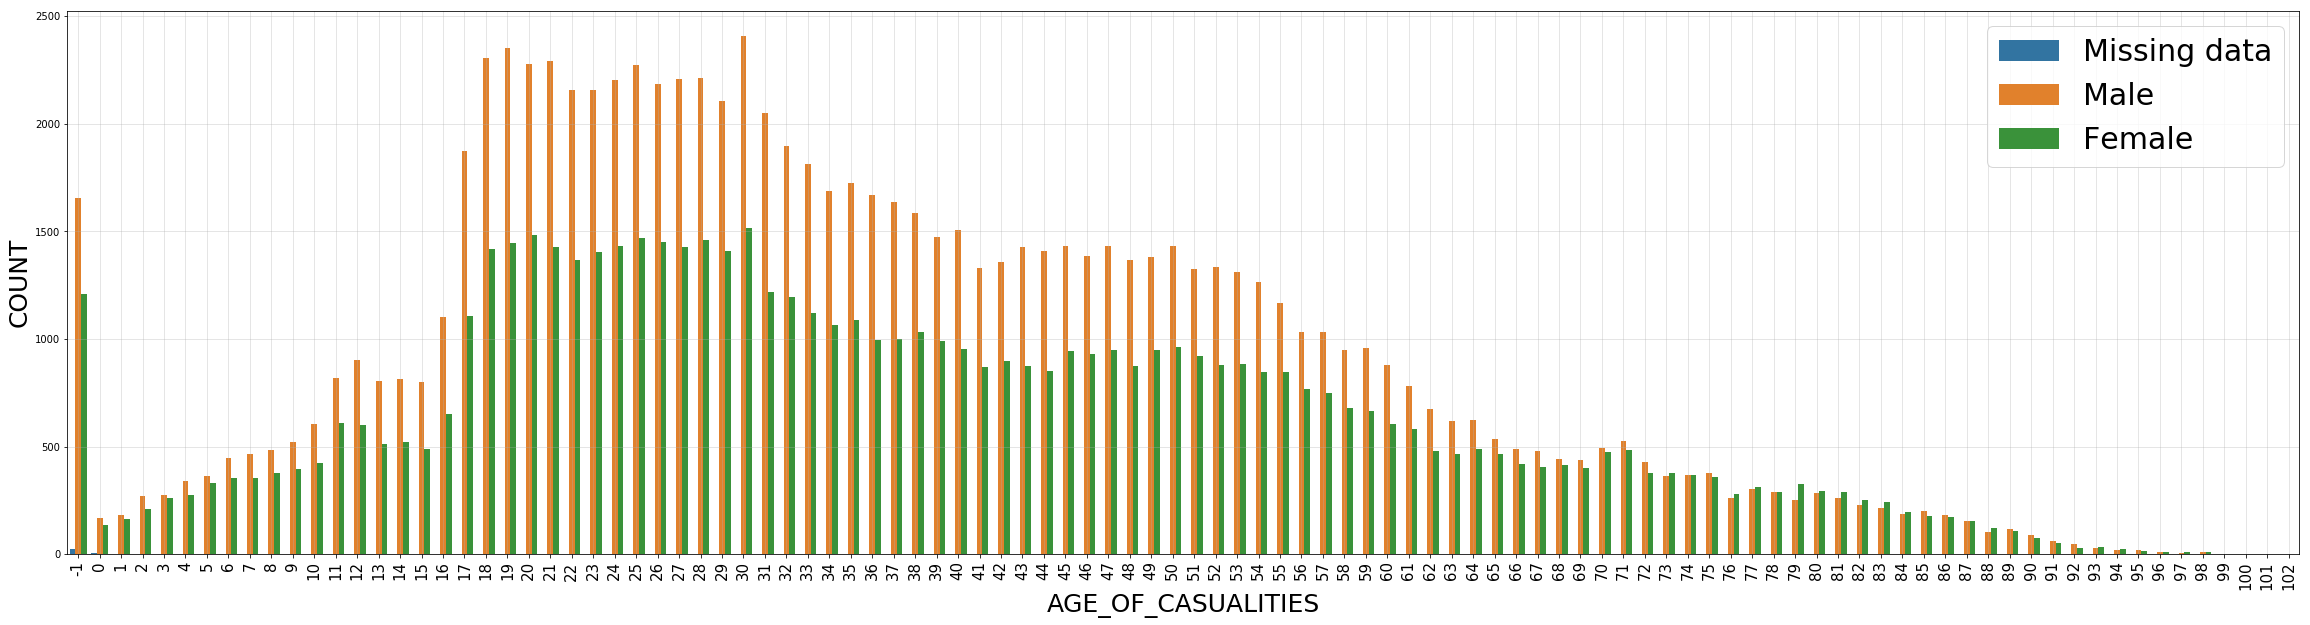

In [89]:
plt.figure(figsize=(40,10))
sns.countplot('Age_of_Casualty',hue='Sex_of_Casualty',data=Casualities)
plt.xticks(fontsize=15,rotation=90)
plt.legend(['Missing data','Male','Female'],prop={'size': 30}, loc=1)
plt.grid(alpha=0.4)
plt.xlabel('AGE_OF_CASUALITIES', fontsize=25)
plt.ylabel('COUNT', fontsize=25)
plt.show()

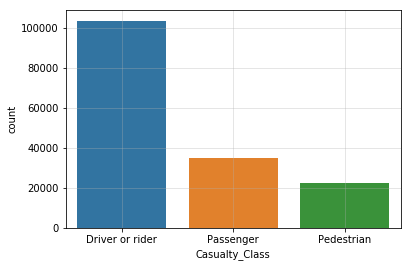

In [90]:


plt.figure()
ax=sns.countplot('Casualty_Class', data=Casualities)
ax.set_xticklabels(['Driver or rider','Passenger','Pedestrian'])
plt.grid(alpha=0.4)
plt.show()



Vehicle Analysis

In [93]:
Vehicles = pd.read_csv('http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Vehicles_2018.csv')

In [94]:
Vehicles.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2018010080971,1,9,0,18,0,0,0,0,0,...,6,1,32,6,1995,2,5,8,1,8
1,2018010080971,2,8,0,18,0,0,0,0,0,...,6,1,48,8,1798,8,6,1,1,1
2,2018010080973,1,9,0,18,0,2,0,0,0,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
3,2018010080974,1,8,0,7,0,8,0,0,0,...,1,1,40,7,1797,8,6,3,1,3
4,2018010080974,2,9,0,18,0,1,0,0,3,...,6,1,21,5,-1,-1,-1,5,1,5


In [96]:
Dataframe1=Accidents.merge(Casualities, right_index=True, left_index=True)
Dataframe2=Dataframe1.merge(Vehicles, right_index=True, left_index=True)
Dataframe2.head()

,Accident_Index_x,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Journey_Purpose_of_Driver_y,Sex_of_Driver_y,Age_of_Driver_y,Age_Band_of_Driver_y,Engine_Capacity_(CC)_y,Propulsion_Code_y,Age_of_Vehicle_y,Driver_IMD_Decile_y,Driver_Home_Area_Type_y,Vehicle_IMD_Decile_y
0,2018010080971,-0.139737,51.524587,1,3,2,2,01/01/2018,2,01:30,...,6,1,32,6,1995,2,5,8,1,8
1,2018010080973,0.046471,51.539651,1,3,1,1,01/01/2018,2,00:50,...,6,1,48,8,1798,8,6,1,1,1
2,2018010080974,-0.102474,51.529746,1,3,2,1,01/01/2018,2,00:45,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
3,2018010080981,0.037828,51.530179,1,2,2,1,01/01/2018,2,03:00,...,1,1,40,7,1797,8,6,3,1,3
4,2018010080982,0.065781,51.469258,1,2,2,2,01/01/2018,2,02:20,...,6,1,21,5,-1,-1,-1,5,1,5


In [97]:
Dataframe2.columns

Index(['Accident_Index_x', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Detail', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Accident_Index_y', 'Vehicle_Reference_x',
       'Vehicle_Type_x', 'Towing_and_Articulation_x', 'Vehicle_Manoeuvre_x',
       'Vehicle_Location-Restricted_Lane_x', 'Junction_Location_x',
       'Skidding_and_Overturning_x', 'Hit_Object_in_Carriageway_x',
       'Vehicle_Leaving_Carriageway_x', 'Hit_Object_off_Carriageway_x',
       '1st_Point_of_Impact_x', 'Was_Vehicle_Left_Hand_D

Accident severity distribution based on light conditions

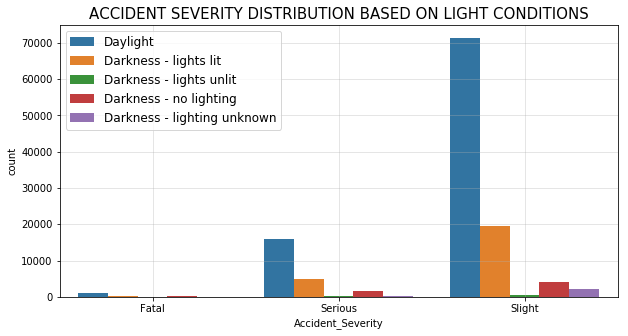

In [103]:
plt.figure(figsize=(10,5))
ax=sns.countplot('Accident_Severity', hue='Light_Conditions', data=Dataframe2)
plt.legend(['Daylight','Darkness - lights lit','Darkness - lights unlit','Darkness - no lighting','Darkness - lighting unknown'],fontsize=12)
ax.set_xticklabels(['Fatal','Serious','Slight'])
plt.title('ACCIDENT SEVERITY DISTRIBUTION BASED ON LIGHT CONDITIONS', fontsize=15)
plt.grid(alpha=0.4)


Accident severity distribution based on road type

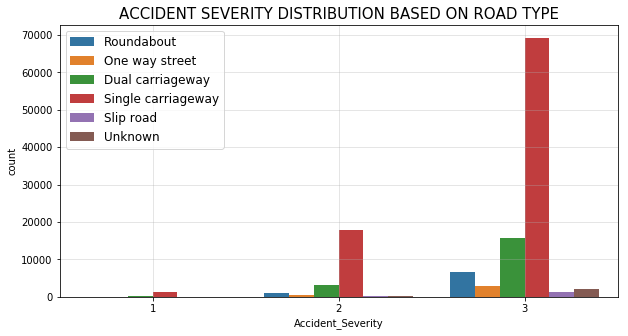

In [104]:
plt.figure(figsize=(10,5))
sns.countplot('Accident_Severity', hue='Road_Type', data=Dataframe2)
ax.set_xticklabels(['Fatal','Serious','Slight'])
plt.legend(['Roundabout','One way street','Dual carriageway','Single carriageway','Slip road','Unknown'], fontsize=12)
plt.title('ACCIDENT SEVERITY DISTRIBUTION BASED ON ROAD TYPE', fontsize=15)
plt.grid(alpha=0.4)

<Figure size 720x360 with 0 Axes>

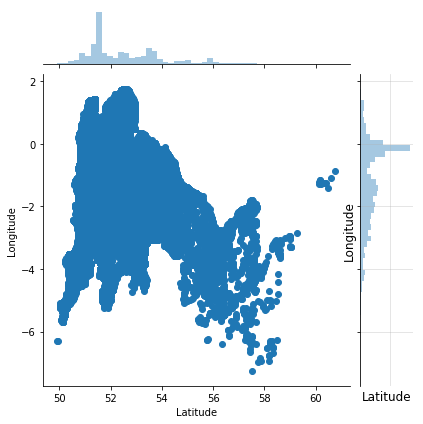

In [105]:
#Scatter plot of Longitude/Latitude
plt.figure(figsize=(10,5))
sns.jointplot(x='Latitude',y='Longitude',kind = 'scatter',data=Dataframe2)
plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Longitude',fontsize=12)
plt.grid(alpha=0.4)

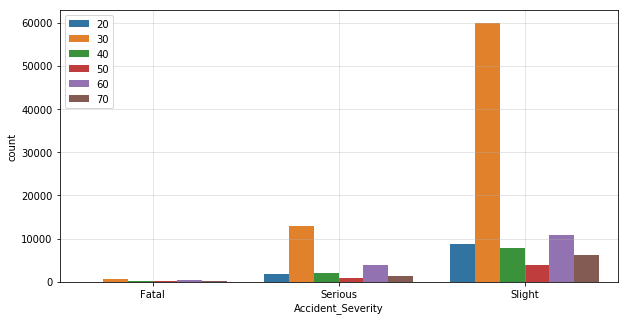

In [106]:
plt.figure(figsize=(10,5))
ax=sns.countplot('Accident_Severity', hue='Speed_limit', data=Dataframe2)
plt.grid(alpha=0.4)
ax.set_xticklabels(['Fatal','Serious','Slight'])
plt.legend(loc=2) 

In [107]:
Dataframe3=Dataframe2[['Latitude','Longitude']].dropna()
locationlist = Dataframe3.values.tolist()
len(locationlist)
locationlist[7]
Dataframe3.shape

(122567, 2)

In [108]:
import folium
from folium.plugins import MarkerCluster
m = folium.Map(location=[51.5085300,-0.1257400], tiles='openstreetmap', zoom_start=15)
marker_cluster = MarkerCluster().add_to(m)
for i in range(0,len(locationlist)):
    folium.CircleMarker(locationlist[i],radius = float(Dataframe2["Accident_Severity"].values[0]/1e7),
                        popup="Accident Severity : %s"%Dataframe2["Accident_Severity"].values[0],color="red",fill_color='pink').add_to(m)
m

ModuleNotFoundError: No module named 'folium'

In [112]:
#python -m pip install folium -- issue in nstalling folium hence the above cannot be run successfully.

SyntaxError: invalid syntax (<ipython-input-112-ce90cc1bc3b6>, line 1)

CONCLUSION:
    
    
The following observations are made from the analysis above :
1. Many of the casualities suffered in accidents are mostly teenagers and youngsters around the age of 17-21
2. Many of the casualities suffered are males from every age groups
3. Many of the accidents occured in the region comes under the age group of 17-21
4. Many of the accidents are occured in the daylight.

Note : Completed this rather hard course of Data Science. Being a layman in this area, these nine courses have indeed been a great learning. Thank you to Coursera and all the reviewers.